In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns   

# Load the dataset  
df = pd.read_csv("kasha_data/exercise_1_pds.csv")    


#### 1.1 Data Quality Checks

In [54]:
df.head() 

,id,facility_name,ccc,primary_phone,alt_phone,age,sex,client_type,sub_county,last_vl_date,...,medication_returned,name_of_rider,county,dob,county_of_residence,group_identifier,mmd_days,next_appointment_date,appointment_attended_date,appointment_status
0,1,Alupe SCH,91428-77906,254761840168,NaN,43,Female,Returning,Kisumu West,2024-10-30,...,No,Rider 128,Kisumu,1982-07-30,Uasin Gishu,AGYW,30,2025-10-11,2025-11-19,attended
1,2,Mutomo Mission,62658-16589,254787040728,NaN,35,Female,New,Kisumu East,NaN,...,No,Rider 217,Uasin Gishu,1991-03-23,Siaya,Adolescents,180,2025-10-25,2025-11-14,attended
2,3,Kisumu County Hospital,45275-48978,254740237015,NaN,30,Male,Key Population,Alego Usonga,2024-12-23,...,No,Rider 55,Busia,1995-05-06,Mombasa,Peds,180,2025-11-12,NaN,missed
3,4,Mutomo Mission,60358-92674,254733225094,NaN,53,Male,Adult,Eldoret East,2025-02-10,...,No,Rider 72,Mombasa,1972-06-16,Mombasa,Adolescents,30,2025-10-03,NaN,missed
4,5,Coast General,35064-53839,254713463291,NaN,73,Female,PMTCT,Kisumu East,2025-03-23,...,No,Rider 68,Uasin Gishu,1952-05-18,Uasin Gishu,Peds,60,2025-05-11,2025-05-18,attended


In [55]:
print(df.shape)
print(df.columns)

(1200, 30)
Index(['id', 'facility_name', 'ccc', 'primary_phone', 'alt_phone', 'age',
       'sex', 'client_type', 'sub_county', 'last_vl_date', 'drug_refill_date',
       'prefered_delivery_date', 'delivery_type', 'delivery_package',
       'prefered_delivery_location', 'actual_delivery_date',
       'actual_delivery_location', 'delivery_geocoordinates',
       'delivery_outcome', 'delivery_time', 'medication_returned',
       'name_of_rider', 'county', 'dob', 'county_of_residence',
       'group_identifier', 'mmd_days', 'next_appointment_date',
       'appointment_attended_date', 'appointment_status'],
      dtype='object')


In [56]:
# Exploring the data features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1200 non-null   int64  
 1   facility_name               1200 non-null   object 
 2   ccc                         1200 non-null   object 
 3   primary_phone               1200 non-null   int64  
 4   alt_phone                   281 non-null    float64
 5   age                         1200 non-null   int64  
 6   sex                         1200 non-null   object 
 7   client_type                 1200 non-null   object 
 8   sub_county                  1200 non-null   object 
 9   last_vl_date                1012 non-null   object 
 10  drug_refill_date            1200 non-null   object 
 11  prefered_delivery_date      1200 non-null   object 
 12  delivery_type               1200 non-null   object 
 13  delivery_package            1200 

In [57]:
#checking for missing values    
df.isna().sum().sort_values(ascending=False)

alt_phone                     919
appointment_attended_date     278
actual_delivery_date          196
actual_delivery_location      196
last_vl_date                  188
facility_name                   0
age                             0
sex                             0
client_type                     0
sub_county                      0
drug_refill_date                0
ccc                             0
primary_phone                   0
id                              0
delivery_package                0
delivery_type                   0
prefered_delivery_date          0
prefered_delivery_location      0
delivery_outcome                0
delivery_time                   0
medication_returned             0
delivery_geocoordinates         0
name_of_rider                   0
county                          0
county_of_residence             0
dob                             0
group_identifier                0
mmd_days                        0
next_appointment_date           0
appointment_st

In [58]:
df['appointment_status'].value_counts()

appointment_status
attended    922
missed      278
Name: count, dtype: int64

In [59]:
#Checking for outliers and summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1200.0,6.005000e+02,3.465545e+02,1.000000e+00,3.007500e+02,6.005000e+02,9.002500e+02,1.200000e+03
primary_phone,1200.0,2.547510e+11,2.899508e+07,2.547001e+11,2.547255e+11,2.547511e+11,2.547767e+11,2.548000e+11
alt_phone,281.0,2.547481e+11,2.975270e+07,2.547001e+11,2.547206e+11,2.547481e+11,2.547759e+11,2.547999e+11
age,1200.0,4.498500e+01,1.682515e+01,1.600000e+01,3.000000e+01,4.500000e+01,5.900000e+01,7.400000e+01
mmd_days,1200.0,6.067500e+01,3.566307e+01,3.000000e+01,3.000000e+01,6.000000e+01,9.000000e+01,1.800000e+02


In [60]:
# Detecting repeated patient records (using patient ID and next appointment date -> to uniquely identify a patient)

duplicates = df.duplicated(subset=['ccc', 'next_appointment_date']).sum()

print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


In [61]:
date_cols = ['next_appointment_date', 'appointment_attended_date', 
             'prefered_delivery_date', 'actual_delivery_date',
             'drug_refill_date', 'last_vl_date']

df[date_cols].dtypes

next_appointment_date        object
appointment_attended_date    object
prefered_delivery_date       object
actual_delivery_date         object
drug_refill_date             object
last_vl_date                 object
dtype: object

In [62]:
#changing the date strigs to datetime format
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

df[date_cols].dtypes


next_appointment_date        datetime64[ns]
appointment_attended_date    datetime64[ns]
prefered_delivery_date       datetime64[ns]
actual_delivery_date         datetime64[ns]
drug_refill_date             datetime64[ns]
last_vl_date                 datetime64[ns]
dtype: object

In [63]:
# Patients attended before the scheduled appointment (potential data entry errors)
inappropriate_df = df[df['appointment_attended_date'] < df['next_appointment_date']]
print(f"Number of records with appointment attended before scheduled date: {inappropriate_df.shape[0]}")

#lets see time difference in inappropriate records
inappropriate_df['time_diff'] = (inappropriate_df['next_appointment_date'] - inappropriate_df['appointment_attended_date']).dt.days
inappropriate_df[['next_appointment_date', 'appointment_attended_date', 'time_diff']].describe()
# since time difference is within 2 days, we can assume  patients came a bit earlier than scheduled date


Number of records with appointment attended before scheduled date: 51


/tmp/ipykernel_262305/1675829793.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,next_appointment_date,appointment_attended_date,time_diff
count,51,51,51.000000
mean,2025-07-20 02:49:24.705882368,2025-07-18 13:38:49.411764736,1.549020
min,2025-04-30 00:00:00,2025-04-28 00:00:00,1.000000
25%,2025-06-08 12:00:00,2025-06-07 00:00:00,1.000000
50%,2025-07-04 00:00:00,2025-07-03 00:00:00,2.000000
75%,2025-09-04 12:00:00,2025-09-03 00:00:00,2.000000
max,2025-11-11 00:00:00,2025-11-09 00:00:00,2.000000
std,NaN,NaN,0.502543


In [64]:
#checking negative ages
negative_ages = df[df['age'] < 0]
print(f"Number of records with negative ages: {negative_ages.shape[0]}") # no negative ages found

Number of records with negative ages: 0


In [65]:
#checkng for unrealitistic mmd_days -> should be between 0 and 180
print(df['mmd_days'].value_counts()) # all good

mmd_days
30     462
60     435
90     241
180     62
Name: count, dtype: int64


#### 1.2 Exploring Data Disribution and Patterns

In [66]:
#setting custom kasha color themes

kasha_colors = {
    "primary": "#E5007D",   # deep magenta
    "secondary": "#F2F2F2", # light gray background
    "accent": "#333333",    # dark text / contrast
    "white": "#FFFFFF"
}

# Apply a simple custom theme
sns.set_style("whitegrid")
sns.set_palette([kasha_colors["primary"], kasha_colors["accent"]])
plt.rcParams["axes.facecolor"] = kasha_colors["white"]
plt.rcParams["figure.facecolor"] = kasha_colors["white"]
plt.rcParams["axes.edgecolor"] = kasha_colors["secondary"]
plt.rcParams["grid.color"] = kasha_colors["secondary"]
plt.rcParams["axes.labelcolor"] = kasha_colors["accent"]
plt.rcParams["xtick.color"] = kasha_colors["accent"]
plt.rcParams["ytick.color"] = kasha_colors["accent"]
plt.rcParams["text.color"] = kasha_colors["accent"]

plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.labelweight"] = "semibold"
plt.rcParams["font.family"] = "DejaVu Sans"



##### 1.2.a Age Distribution

In [67]:
print(df['age'].describe())

count    1200.00000
mean       44.98500
std        16.82515
min        16.00000
25%        30.00000
50%        45.00000
75%        59.00000
max        74.00000
Name: age, dtype: float64


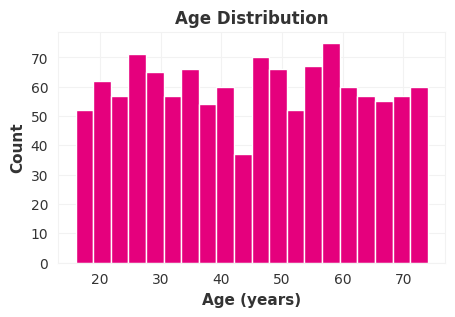

In [68]:
plt.figure(figsize=(5,3))
df['age'].hist(bins=20, color=kasha_colors["primary"], edgecolor='white')
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

The age range spans roughly from 15 to 75 years, indicating a broad demographic coverage across adult age groups.

The distribution appears fairly uniform, meaning there’s no strong skew toward younger or older ages — clients are almost evenly represented across decades.

Slight peaks appear around the 20–25, 35–40, and 55–60 age brackets, suggesting those age groups might be more engaged or more represented in the dataset.

The lowest participation is around the 40–45 range.

##### 1.2.b.  Sex Propotion

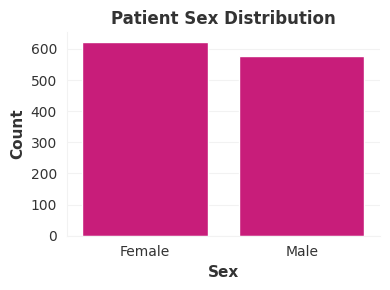

In [69]:
plt.figure(figsize=(4,3))
sns.countplot(
    data=df,
    x='sex',
    color=kasha_colors["primary"]
)
plt.title("Patient Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
sns.despine()
plt.tight_layout()
plt.show()

The slight female majority could reflect Kasha’s focus on women’s health services, but the small difference also suggests that men actively engage with Kasha’s programs.

Since there’s no major gender imbalance, adherence and LFTU patterns can be analyzed without strong gender bias.

##### 1.2.c. Client Type

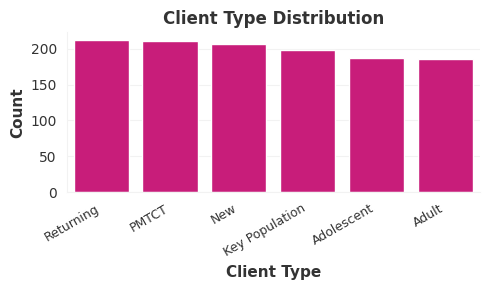

In [70]:

plt.figure(figsize=(5,3))  # compact figure size

sns.countplot(
    data=df,
    x='client_type',
    color=kasha_colors["primary"],
    order=df['client_type'].value_counts().index  # sort by frequency
)

plt.title("Client Type Distribution", color=kasha_colors["accent"])
plt.xlabel("Client Type")
plt.ylabel("Count")
plt.xticks(rotation=30, ha='right', fontsize=9)
sns.despine()
plt.tight_layout()
plt.show()


The distribution across all groups is relatively even, with each category having roughly 170–210 clients.
This balanced spread suggests diverse client engagement across various demographic and program types.

##### Appointment Attendance Patterns

In [71]:

today = pd.Timestamp.today()

# lets create a  days_late metric to see adherence trends
df['days_late'] = np.where(
    df['appointment_attended_date'].notna(),
    (df['appointment_attended_date'] - df['next_appointment_date']).dt.days,
    (today - df['next_appointment_date']).dt.days
)

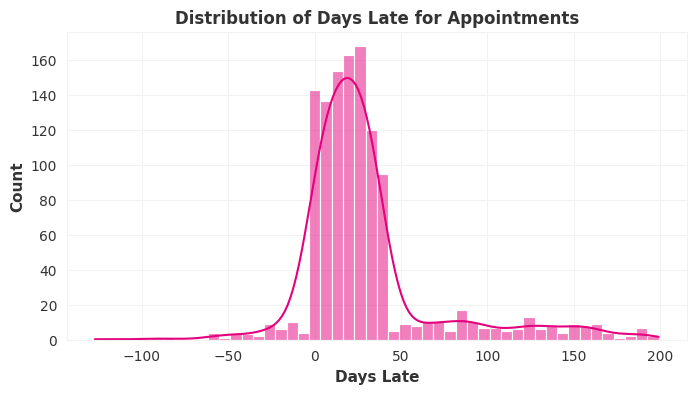

In [72]:
plt.figure(figsize=(8,4))
sns.histplot(df['days_late'], bins=50, kde=True)
plt.title('Distribution of Days Late for Appointments')
plt.xlabel('Days Late')
plt.ylabel('Count')
plt.show()

In [73]:
# Define IIT status
df['IIT_status'] = np.select(
    [
        df['days_late'] <= 0,           # On or before appointment date
        (df['days_late'] > 0) & (df['days_late'] <= 28),   # Late but <28 days
        df['days_late'] > 28            # Missed >28 days → IIT
    ],
    ['On-time', 'Late', 'IIT'],
    default='Unknown'
)

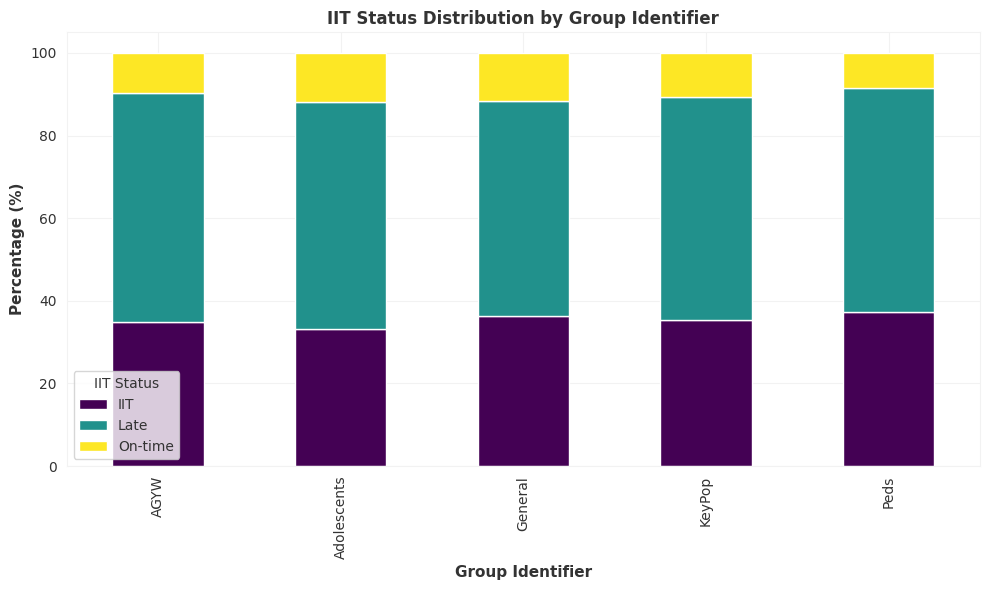

In [74]:
iit_summary = df.groupby('group_identifier')['IIT_status'].value_counts(normalize=True).unstack().fillna(0) * 100
iit_summary.round(1)
iit_summary.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('IIT Status Distribution by Group Identifier')
plt.xlabel('Group Identifier')
plt.ylabel('Percentage (%)')
plt.legend(title='IIT Status')
plt.tight_layout()
plt.show()

##### 1.2 Understanding the Operational Variables

**Delivery Type Distribution**

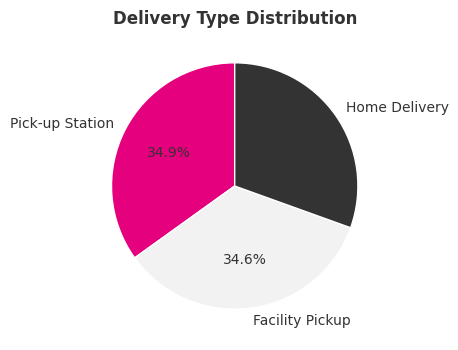

In [75]:
plt.figure(figsize=(4,4))
df['delivery_type'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#E5007D', '#F2F2F2', '#333333'],  
    startangle=90
)
plt.title("Delivery Type Distribution")
plt.ylabel("")
plt.show()



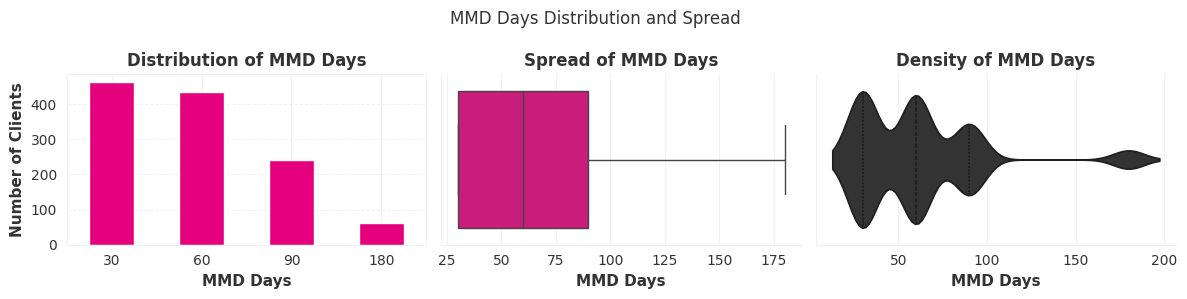

In [76]:


fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# --- Bar Chart (left) ---
df['mmd_days'].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[0]
)
axes[0].set_title("Distribution of MMD Days")
axes[0].set_xlabel("MMD Days")
axes[0].set_ylabel("Number of Clients")
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', linewidth=0.7)

# --- Box Plot (middle) ---
sns.boxplot(
    data=df,
    x='mmd_days',
    ax=axes[1]
)
axes[1].set_title("Spread of MMD Days")
axes[1].set_xlabel("MMD Days")
axes[1].set_ylabel("")
sns.despine(ax=axes[1])

# --- Violin Plot (rightmost) ---
sns.violinplot(
    data=df,
    x='mmd_days',
    color=kasha_colors["accent"],
    inner='quartile'
)
axes[2].set_title("Density of MMD Days")
axes[2].set_xlabel("MMD Days")
sns.despine(ax=axes[2])

fig.suptitle("MMD Days Distribution and Spread")
plt.tight_layout()
plt.show()


The distribution of MMD days shows that most clients receive 30- or 60-day refills, with fewer on 90- or 180-day schedules. The median MMD duration is around 60 days, indicating that short dispensing intervals dominate. The data is right-skewed, suggesting limited uptake of longer refill periods, though a few clients receive up to 180 days of medication. Overall, this pattern highlights opportunities to expand longer MMD durations for stable clients to improve efficiency and reduce facility visits.

##### Analysing Location Distribution

In [77]:
df['delivery_geocoordinates' ].head()

0     2.25310,39.57269
1     4.44818,39.07134
2     4.47991,37.88778
3    -0.72882,36.37417
4    -2.16743,36.68788
Name: delivery_geocoordinates, dtype: object

In [78]:
# Split "lat,lon" string into two separate columns
df[['lat', 'lon']] = df['delivery_geocoordinates'].str.split(',', expand=True)

# Convert them to numeric
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lon'] = pd.to_numeric(df['lon'], errors='coerce')

df[['lat', 'lon']].head()

,lat,lon
0,2.25310,39.57269
1,4.44818,39.07134
2,4.47991,37.88778
3,-0.72882,36.37417
4,-2.16743,36.68788


##### Relationship between Delivery Type & Appointment Attendance

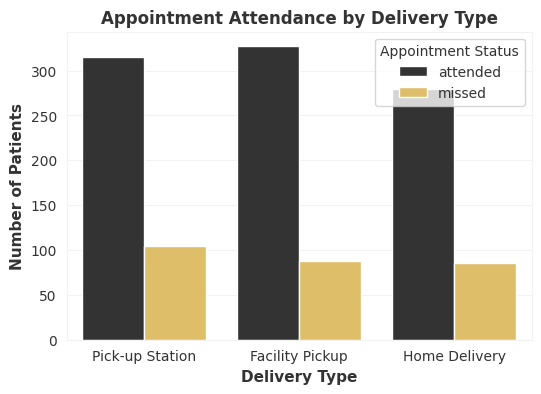

In [79]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='delivery_type', hue='appointment_status', palette=[kasha_colors['accent'], "#f3c756"])
plt.title('Appointment Attendance by Delivery Type')
plt.xlabel('Delivery Type')
plt.ylabel('Number of Patients')
plt.legend(title='Appointment Status')
plt.show()


##### 1.Facilities Registered

In [80]:
import plotly.express as px

# Drop rows without valid coordinates
df_map = df.dropna(subset=['lat','lon']).copy()

fig = px.scatter_mapbox(
    df_map,
    lat='lat',
    lon='lon',
    color='delivery_type',          # Different colors for delivery modes
    hover_name='facility_name',     # Show facility name on hover
    hover_data={
        'county': True,
        'sub_county': True,
        'client_type': True,
        'delivery_outcome': True,
        'age': True,
        'sex': True,
        'lat': False,
        'lon': False
    },
    zoom=6,
    height=600,
    title="Kasha Registered Facilities & Delivery Points in Kenya",
    mapbox_style='open-street-map'
)

fig.update_layout(
    legend_title="Delivery Type",
    margin=dict(l=0, r=0, t=30, b=0)
)
fig.write_html("kasha_facility_map.html")



/tmp/ipykernel_262305/3739147241.py:6: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



#### Looking Into Kasha Adoption Per County

In [81]:
    
# Filter for successful deliveries
delivered = df[df['delivery_outcome'] == 'Delivered']

# Group and count by county and client type
adoption_by_county = delivered.groupby(['county', 'client_type']).size().reset_index(name='count')

# Pivot the table for better readability
adoption_pivot = adoption_by_county.pivot(index='county', columns='client_type', values='count').fillna(0)

adoption_pivot


client_type,Adolescent,Adult,Key Population,New,PMTCT,Returning
county,,,,,,
Busia,23,31,34,27,28,32
Kisumu,18,25,27,36,23,29
Mombasa,26,29,20,26,30,30
Nairobi,31,25,28,29,32,22
Siaya,30,25,25,24,28,33
Uasin Gishu,23,28,25,33,38,31


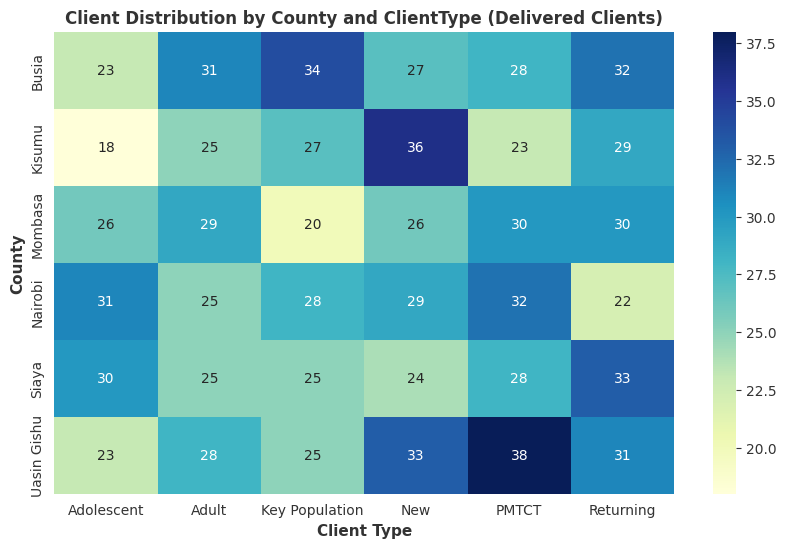

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(adoption_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Client Distribution by County and ClientType (Delivered Clients)", fontweight='bold')
plt.xlabel("Client Type")
plt.ylabel("County")
plt.show()

PMTCT clients are most concentrated in Uasin Gishu (38) and Kisumu (36), suggesting stronger uptake of mother-to-child prevention services in these areas.

Key Populations are highest in Busia (34) and Nairobi (28), aligning with regions known for higher key population engagement.

Adolescent and New clients are evenly distributed, indicating balanced outreach.

Overall, each county has a fairly diverse mix of client types, with PMTCT and Returning clients consistently showing strong representation.

#### Analysing Delivery Outcome Per County

In [83]:
# Count deliveries per county and delivery outcome
delivery_summary = (
    df.groupby(['county', 'delivery_outcome'])
      .size()
      .reset_index(name='count')
)

delivery_pivot = delivery_summary.pivot(index='county', columns='delivery_outcome', values='count').fillna(0)
delivery_pivot['total'] = delivery_pivot.sum(axis=1)
delivery_pivot['success_rate'] = (delivery_pivot.get('Delivered', 0) / delivery_pivot['total']) * 100
delivery_pivot.sort_values('success_rate', ascending=False, inplace=True)
delivery_pivot.head()

delivery_outcome,Delivered,Not Delivered - Address Not Found,Not Delivered - Moved,Not Delivered - Refused,Not Delivered - Stockout,Not Delivered - Unreachable,total,success_rate
county,,,,,,,,
Nairobi,167,6,6,6,5,4,194,86.082474
Uasin Gishu,178,5,6,10,7,3,209,85.167464
Busia,175,2,6,8,3,13,207,84.541063
Mombasa,161,7,6,8,6,7,195,82.564103
Kisumu,158,11,8,7,4,4,192,82.291667


<Axes: xlabel='county', ylabel='count'>

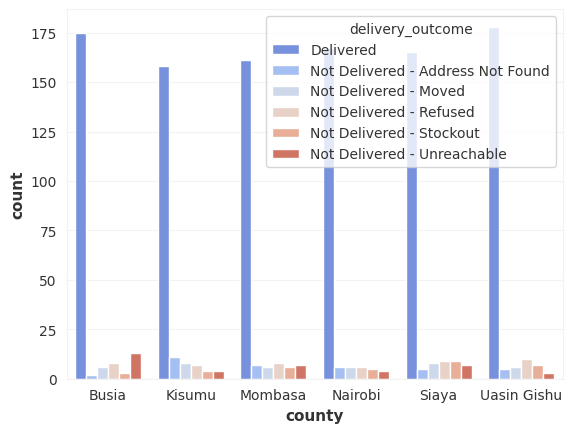

In [84]:
sns.barplot(
    data=delivery_summary,
    x='county',
    y='count',
    hue='delivery_outcome',
    palette='coolwarm'
)



Nairobi (86.1%) and Uasin Gishu (85.2%) have the highest delivery success rates, suggesting efficient coordination and accurate client contact.

Counties needing improvement: Kisumu (82.3%) and Mombasa (82.6%) trail slightly behind, largely due to higher counts of “Address Not Found” and “Unreachable” outcomes.

Failure pattern:

“Refused” and “Stockout” failures are consistent across counties, indicating supply chain or communication gaps rather than location-specific issues.

Busia has relatively more “Unreachable” cases (13), pointing to potential network or contact problems in that region

####  Feature Engineering

##### Feature 1: time_since_last_vl

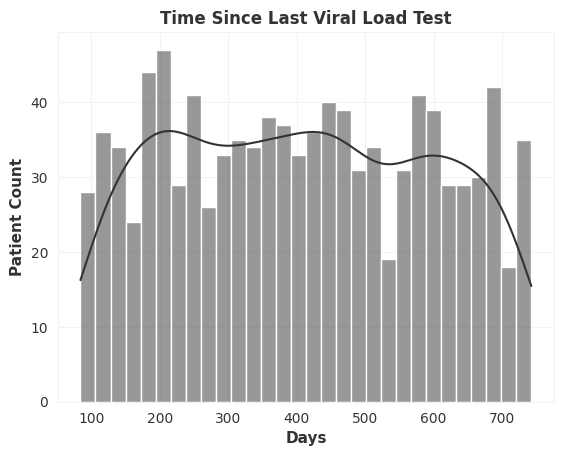

In [85]:
# Time since last viral load test

df['time_since_last_vl'] = (pd.Timestamp('today') - df['last_vl_date']).dt.days

# Visualize
sns.histplot(df['time_since_last_vl'], bins=30, kde=True, color=kasha_colors['accent'])
plt.title('Time Since Last Viral Load Test')
plt.xlabel('Days')
plt.ylabel('Patient Count')
plt.show()


Most patients are between 100–700 days since their last test, with a fairly even spread — no clear clustering at recent (0–100 days) or very old (>700 days) intervals.

The KDE line gently fluctuates, meaning there’s no sharp testing cycle; instead, viral load testing seems to occur irregularly.

Why Important?:

*Proxy for Patient Engagement:* 

Patients who regularly take viral load (VL) tests are actively engaged in care.

A long gap since the last VL test suggests missed visits, poor follow-up, or potential disengagement.

*Early Warning Signal*:

Increasing time_since_last_vl beyond recommended intervals (e.g., >6–12 months) can act as an early warning that a patient is at high risk of LTFU.

##### Feature 2:  Delivery_Reliability_Score

In [86]:
# Drop any existing delivery_reliability_score columns to avoid merge conflicts
df = df.drop(
    columns=[col for col in df.columns if col.startswith('delivery_reliability_score')],
    errors='ignore'
)

delivery_success_rate = (
    df.groupby('ccc')['delivery_outcome']
    .apply(lambda x: (x == 'Delivered').mean())
    .reset_index(name='delivery_reliability_score')
)
df = df.merge(delivery_success_rate, on='ccc', how='left')
df.head(5)

,id,facility_name,ccc,primary_phone,alt_phone,age,sex,client_type,sub_county,last_vl_date,...,mmd_days,next_appointment_date,appointment_attended_date,appointment_status,days_late,IIT_status,lat,lon,time_since_last_vl,delivery_reliability_score
0,1,Alupe SCH,91428-77906,254761840168,NaN,43,Female,Returning,Kisumu West,2024-10-30,...,30,2025-10-11,2025-11-19,attended,39.0,IIT,2.25310,39.57269,348.0,0.0
1,2,Mutomo Mission,62658-16589,254787040728,NaN,35,Female,New,Kisumu East,NaT,...,180,2025-10-25,2025-11-14,attended,20.0,Late,4.44818,39.07134,NaN,1.0
2,3,Kisumu County Hospital,45275-48978,254740237015,NaN,30,Male,Key Population,Alego Usonga,2024-12-23,...,180,2025-11-12,NaT,missed,-30.0,On-time,4.47991,37.88778,294.0,1.0
3,4,Mutomo Mission,60358-92674,254733225094,NaN,53,Male,Adult,Eldoret East,2025-02-10,...,30,2025-10-03,NaT,missed,10.0,Late,-0.72882,36.37417,245.0,1.0
4,5,Coast General,35064-53839,254713463291,NaN,73,Female,PMTCT,Kisumu East,2025-03-23,...,60,2025-05-11,2025-05-18,attended,7.0,Late,-2.16743,36.68788,204.0,1.0


Text(0, 0.5, 'Number of Clients')

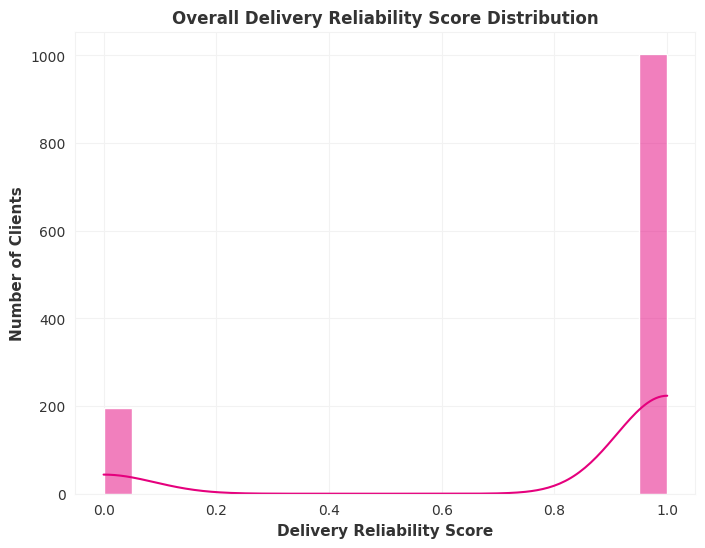

In [87]:
#overall delivery reliability score distribution
plt.figure(figsize=(8,6))
sns.histplot(df['delivery_reliability_score'], bins=20, kde=True, color=kasha_colors['primary'])
plt.title('Overall Delivery Reliability Score Distribution')
plt.xlabel('Delivery Reliability Score')
plt.ylabel('Number of Clients')

Reliability is polarized  -- Bimodal Distribution:
Deliveries are mostly either highly successful or consistently failing — not much middle ground.

Operational follow-up needed:
The small group with success ratio near 0 likely faces structural barriers (bad contact info, remote areas, or stockouts).

Top performers:
The high peak near 1.0 means most of your delivery process works well for the majority — that’s a strong baseline.

##### Feature 3: time_since_last_vl

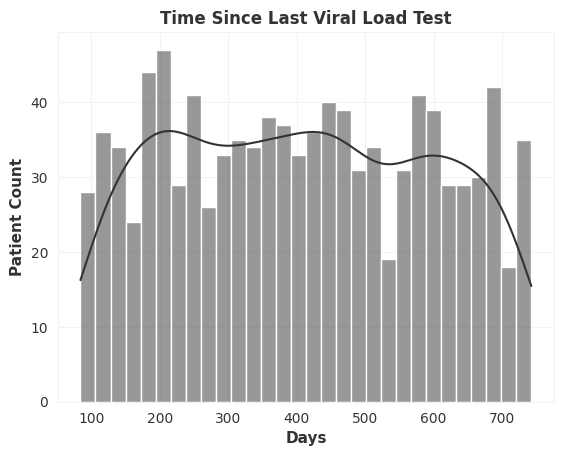

In [88]:
df['time_since_last_vl'] = (pd.Timestamp('today') - df['last_vl_date']).dt.days

# Visualize
sns.histplot(df['time_since_last_vl'], bins=30, kde=True, color=kasha_colors['accent'])
plt.title('Time Since Last Viral Load Test')
plt.xlabel('Days')
plt.ylabel('Patient Count')
plt.show()

##### Tracking Behavioral Stability Index (BSI)

In [89]:
# Important to check patient adherence volatility over time
#df['lateness_std'] = df.groupby('patient_id')['days_late'].transform('std')

## IoT Based Features

1. ### GPS-Based Delivery Adherence Score

Use real-time GPS data from delivery riders’ mobile devices (or Kasha’s logistics app) to track the actual delivery route and completion.

Feature Idea: delivery_route_adherence_score

→ A numerical score (0–1) showing how closely the rider followed the planned route and reached the expected delivery location.

**How this can be useful:**

Late or incomplete deliveries correlate with future missed appointments.

Areas with poor delivery success or rider delays could indicate systemic barriers (e.g., poor road access, safety issues).

The model can use this score to adjust risk of LTFU for that region or client group.


2. ### Feature 2: Smart Pill Bottle / Drug Box Sensor (Adherence IoT Device)**

Equip patients’ refill packages or pill bottles with low-cost smart sensors (e.g., RFID, weight, or motion sensors) that detect when the medication container is opened.

Feature Idea: medication_open_frequency

→ Number of times the pill bottle was opened in the last 7 days (streamed via IoT).

**How this can be useful:**

Real-time indication of medication adherence.

Sudden drop in usage frequency may indicate patient disengagement, early warning for potential LTFU.

Can trigger automated SMS or CHV follow-up.

3. ### Feature 3: GPS-Linked Environmental & Road Condition Index

Use real-time GPS data from delivery riders or mobile app check-ins to pull environmental and mobility data (e.g., from weather APIs, traffic sensors, or satellite feeds).
The system automatically captures weather and road accessibility conditions at the time and location of delivery or appointment. This can be computed using IoT + GPS + external data sources.

Feature Idea: road_accessibility_index

A dynamic feature that quantifies how easy or difficult it was to reach a patient based on:

    Weather (rain, storm, flooding)

    Road conditions (muddy, blocked, under construction)

    Traffic congestion

    Distance from nearest tarmac road

Why It’s Powerful:

Poor road or weather conditions increase delivery delays, missed appointments, and loss to follow-up.

It allows the LTFU model to differentiate between behavioral non-adherence vs. logistical barriers.

Helps Kasha optimize delivery planning — e.g., use motorbikes for impassable routes during rain seasons.